In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#尝试定义一个添加隐藏层函数
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs



In [12]:
#首先定义数据输入
x_data = np.linspace(-1, 1, 300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data= np.square(x_data) - 0.5 + noise

#定义神经网络输入
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

#添加隐藏层
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(prediction - ys), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# #初始化变量
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
        if i % 50 == 0:
            print(sess.run(loss, feed_dict={xs:x_data, ys:y_data}))


0.3170224
0.021753164
0.014625891
0.008241642
0.006704769
0.006035371
0.0055172266
0.005049336
0.0046225013
0.004311745
0.004088823
0.003905515
0.0037792916
0.0036884204
0.0036165612
0.0035673035
0.0035182817
0.003475256
0.0034372446
0.003414601


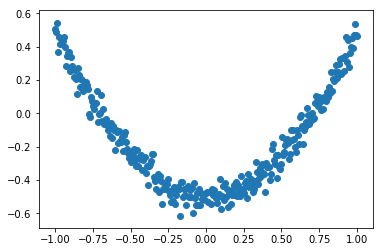

In [13]:
#尝试进行中间结果可视化
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

#再运行一次，输出中间可视化结果
with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
        if i % 50 == 0:
            try:
                ax.lines.remove(lines[0])
            except Exception:
                pass
            prediction_value = sess.run(prediction, feed_dict={xs:x_data})
            lines = ax.plot(x_data, prediction_value, 'r-', lw = 5)
            plt.pause(0.1)

